In [1]:
# important all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import silhouette_score

In [2]:
# reading csv file
loan = pd.read_csv("load_dataset.csv")

In [3]:
# displaying the first 5 rows
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# displaying the last 5 rows
loan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
# dimension of the dataset
loan.shape

(614, 13)

In [6]:
# columns in the dataset
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
# checking for the missing values
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# handling the missing values
loan["Gender"].fillna(loan["Gender"].mode()[0],inplace=True)
loan["Married"].fillna(loan["Married"].mode()[0],inplace= True)
loan["LoanAmount"].fillna(loan["LoanAmount"].mean(),inplace= True)
loan["Dependents"].fillna(loan["Dependents"].mode()[0],inplace= True)
loan["Self_Employed"].fillna(loan["Self_Employed"].mode()[0],inplace= True)
loan["Loan_Amount_Term"].fillna(loan["Loan_Amount_Term"].mean(),inplace= True)
loan["Credit_History"].fillna(loan["Credit_History"].mean(),inplace= True)

In [10]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
# checking for duplicate values
duplicateRows = loan[loan.duplicated()]
duplicateRows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [12]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


<Axes: ylabel='ApplicantIncome'>

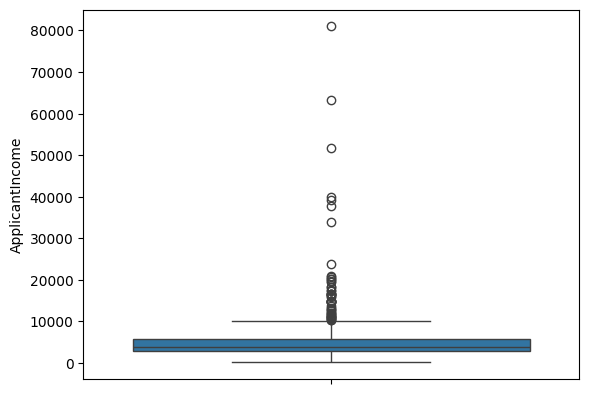

In [13]:
# checking for outliers
sns.boxplot(loan["ApplicantIncome"])

<Axes: ylabel='LoanAmount'>

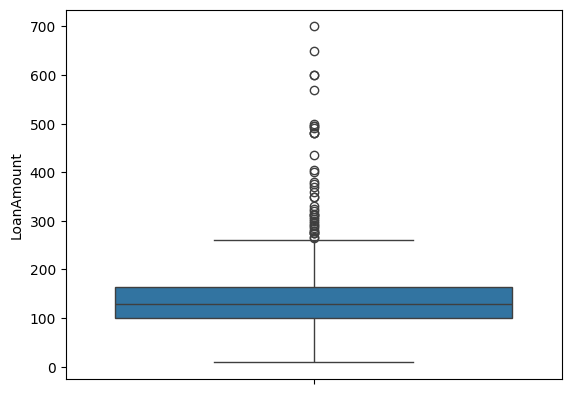

In [14]:
# checking for outliers
sns.boxplot(loan["LoanAmount"])

In [15]:
q1 = loan["LoanAmount"].quantile(0.25)
q3 = loan["LoanAmount"].quantile(0.75)
iqr = q3 - q1
print(q1)
print(q3)
print(iqr)
upper_limit = q3+(1.5*iqr)
lower_limit = q1 -(1.5 *iqr)
print(upper_limit,lower_limit)

100.25
164.75
64.5
261.5 3.5


In [16]:

loan[(loan["LoanAmount"]<lower_limit) | (loan["LoanAmount"]>upper_limit)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.000000,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.000000,Semiurban,N
21,LP001046,Male,Yes,1,Graduate,No,5955,5625.0,315.0,360.0,1.000000,Urban,Y
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.000000,Rural,N
54,LP001186,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.000000,Urban,N
67,LP001233,Male,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1.000000,Urban,Y
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,0.842199,Semiurban,N
126,LP001448,Male,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.000000,Rural,Y
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,0.842199,Urban,Y
135,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.000000,Semiurban,N


In [17]:
loan =loan[(loan["LoanAmount"]>lower_limit) & (loan["LoanAmount"]<upper_limit)]
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


<Axes: ylabel='LoanAmount'>

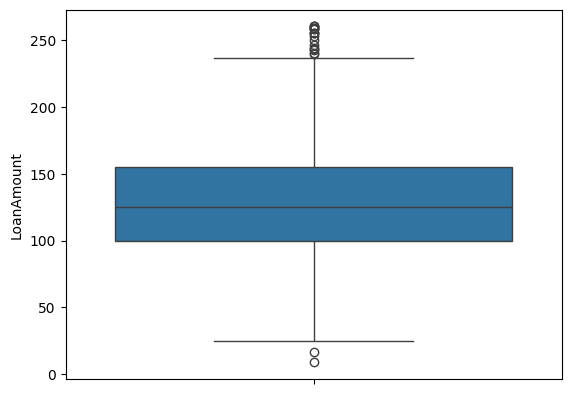

In [18]:
sns.boxplot(loan["LoanAmount"])

In [19]:
q1 = loan["ApplicantIncome"].quantile(0.25)
q3 = loan["ApplicantIncome"].quantile(0.75)
iqr = q3 - q1
print(q1)
print(q3)
print(iqr)
upper_limit = q3+(1.5*iqr)
lower_limit = q1 -(1.5 *iqr)
print(upper_limit,lower_limit)

2769.0
5250.0
2481.0
8971.5 -952.5


In [20]:
loan =loan[(loan["ApplicantIncome"]>lower_limit) & (loan["ApplicantIncome"]<upper_limit)]
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [21]:
'''outliers_mask = (loan["ApplicantIncome"] > upper_limit) | (loan["ApplicantIncome"] < lower_limit)
loan = loan[~outliers_mask]'''

'outliers_mask = (loan["ApplicantIncome"] > upper_limit) | (loan["ApplicantIncome"] < lower_limit)\nloan = loan[~outliers_mask]'

In [22]:
# loan = loan.loc[(loan["ApplicantIncome"]<upper_limit) & (loan["ApplicantIncome"]> lower_limit )]
'''outliers = (loan["LoanAmount"]>upper_limit) | (loan["LoanAmount"]< lower_limit )
loan = loan[~outliers]'''

'outliers = (loan["LoanAmount"]>upper_limit) | (loan["LoanAmount"]< lower_limit )\nloan = loan[~outliers]'

<Axes: ylabel='ApplicantIncome'>

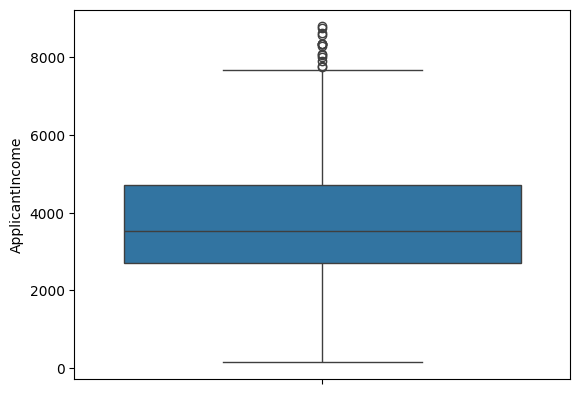

In [23]:
sns.boxplot(loan["ApplicantIncome"])

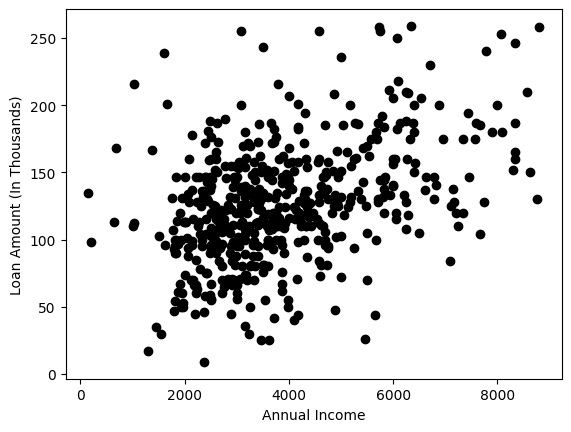

In [24]:
# scatter plot
X = loan[["ApplicantIncome","LoanAmount"]]
#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [25]:
# scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled=sc.fit_transform(X)

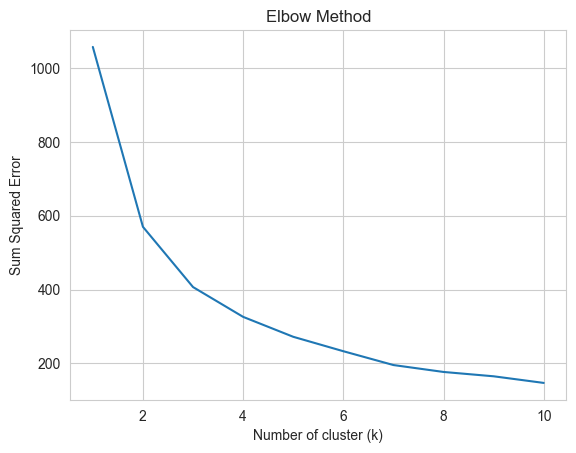

In [26]:
#Find optimum number of cluster
sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
	km = KMeans(n_clusters=k, random_state=2)
	km.fit(X_scaled)
	sse.append(km.inertia_)
    
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)
g.set(xlabel ="Number of cluster (k)", 
	ylabel = "Sum Squared Error", 
	title ='Elbow Method')

plt.show()

Silhouette Score with Euclidean Distance: 0.3445
Silhouette Score with Manhattan Distance: 0.3422
Silhouette Score with Cosine Distance: 0.3119


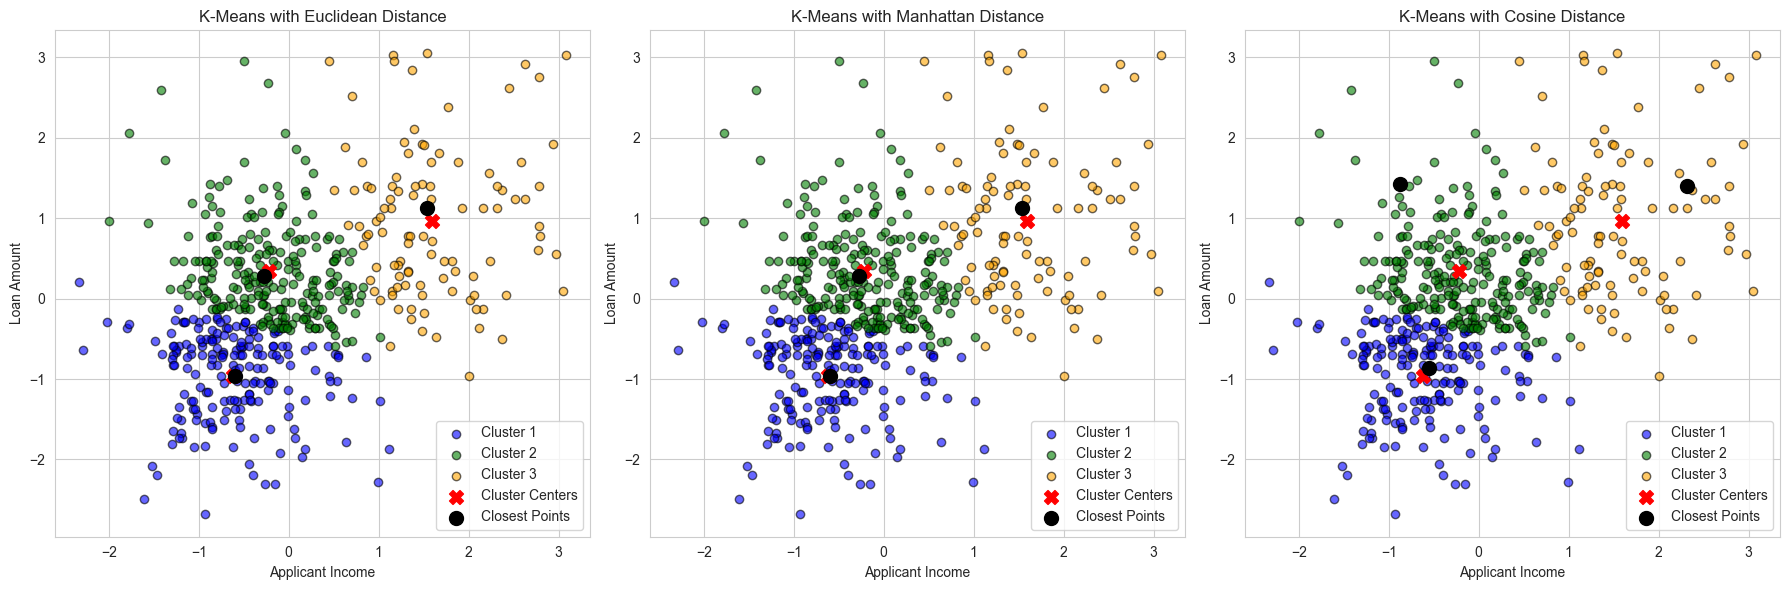

In [49]:
def perform_kmeans_and_visualize(distance_metric, ax):
    # Create a KMeans instance with 3 clusters and k-means initialization
    kmeans = KMeans(n_clusters=3, random_state=42)
    
    # Fit the k-means model
    kmeans.fit(X_scaled)
    
    # Get cluster labels and centers
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_

    # Calculate the closest points to each cluster center
    closest_points, _ = pairwise_distances_argmin_min(centers, X_scaled, metric=distance_metric)
    
    # Calculate silhouette score
    silhouette = silhouette_score(X_scaled, labels, metric=distance_metric)
    print(f'Silhouette Score with {distance_metric.capitalize()} Distance: {silhouette:.4f}')
    
    # Define colors for each cluster
    colors = ['blue', 'green', 'orange']  # Customize colors for 3 clusters
    
    # Plot each cluster separately with a specific color and label
    for cluster in range(3):
        cluster_data = X_scaled[labels == cluster]
        ax.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[cluster], label=f'Cluster {cluster + 1}', alpha=0.6, edgecolors='k')
    
    # Plot the cluster centers
    ax.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=100, label='Cluster Centers')
    
    # Plot the closest points to each cluster center
    ax.scatter(X_scaled[closest_points, 0], X_scaled[closest_points, 1], c='black', marker='o', s=100, label='Closest Points')
    
    # Add legend to the plot
    ax.legend()
    ax.set_title(f'K-Means with {distance_metric.capitalize()} Distance')
    ax.set_xlabel('Applicant Income')
    ax.set_ylabel('Loan Amount')

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Perform k-means clustering, calculate silhouette score, and visualize with different distance metrics
perform_kmeans_and_visualize(distance_metric='euclidean', ax=axes[0])
perform_kmeans_and_visualize(distance_metric='manhattan', ax=axes[1])
perform_kmeans_and_visualize(distance_metric='cosine', ax=axes[2])

# Display the plots
plt.tight_layout()
plt.show()


Silhouette Score with Euclidean Distance: 0.3445
Silhouette Score with Manhattan Distance: 0.3422
Silhouette Score with Cosine Distance: 0.3119


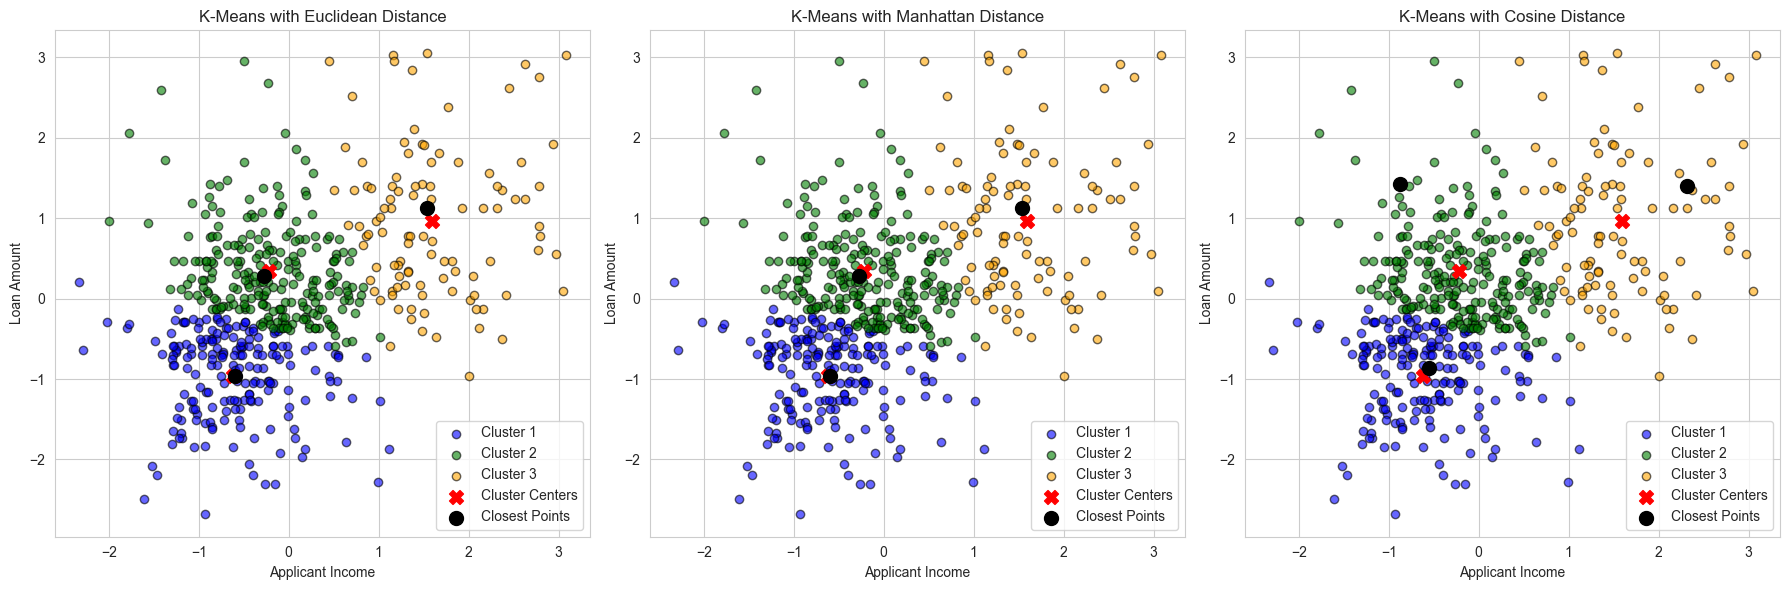

In [48]:
def perform_kmeans_and_visualize(distance_metric, ax):
    # Create a KMeans instance with 3 clusters and k-means++ initialization
    kmeans = KMeans(n_clusters=3, random_state=42,init ="k-means++")
    
    # Fit the k-means model
    kmeans.fit(X_scaled)
    
    # Get cluster labels and centers
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_

    # Calculate the closest points to each cluster center
    closest_points, _ = pairwise_distances_argmin_min(centers, X_scaled, metric=distance_metric)
    
    # Calculate silhouette score
    silhouette = silhouette_score(X_scaled, labels, metric=distance_metric)
    print(f'Silhouette Score with {distance_metric.capitalize()} Distance: {silhouette:.4f}')
    
    # Define colors for each cluster
    colors = ['blue', 'green', 'orange']  # Customize colors for 3 clusters
    
    # Plot each cluster separately with a specific color and label
    for cluster in range(3):
        cluster_data = X_scaled[labels == cluster]
        ax.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[cluster], label=f'Cluster {cluster + 1}', alpha=0.6, edgecolors='k')
    
    # Plot the cluster centers
    ax.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=100, label='Cluster Centers')
    
    # Plot the closest points to each cluster center
    ax.scatter(X_scaled[closest_points, 0], X_scaled[closest_points, 1], c='black', marker='o', s=100, label='Closest Points')
    
    # Add legend to the plot
    ax.legend()
    ax.set_title(f'K-Means with {distance_metric.capitalize()} Distance')
    ax.set_xlabel('Applicant Income')
    ax.set_ylabel('Loan Amount')

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Perform k-means clustering, calculate silhouette score, and visualize with different distance metrics
perform_kmeans_and_visualize(distance_metric='euclidean', ax=axes[0])
perform_kmeans_and_visualize(distance_metric='manhattan', ax=axes[1])
perform_kmeans_and_visualize(distance_metric='cosine', ax=axes[2])

# Display the plots
plt.tight_layout()
plt.show()
